In [1]:
# 各ライブラリの読み込み．いつもコピーしているので使っていないものもあるかもしれない
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt

In [2]:
# csv の読み込み．元々ダウンロードしたものから整形している．
# 項目名が日本語だと使いにくいので変更
myindex = ['date', 'temp_mean', 'temp_max', 'temp_min', 'rain', 'daylight']

# 元データは shift-jis である．年月日は一応日付データとしておく
df  = pd.read_csv('./ootsu2020a.csv', encoding = "shift-jis",parse_dates=['年月日'])

# 項目名の変更．読み込み時に一度に指定できるかもしれないが良く知らない．
df = df.rename(columns=dict(zip(df.columns,myindex))) 

# 最初の部分の確認
df.head()

,date,temp_mean,temp_max,temp_min,rain,daylight
0,2020-01-01,5.4,8.5,1.4,0.0,2.4
1,2020-01-02,6.4,11.1,2.3,0.0,6.7
2,2020-01-03,7.4,11.9,3.7,0.0,2.6
3,2020-01-04,8.0,10.7,4.2,0.5,4.2
4,2020-01-05,5.1,6.5,3.5,2.0,0.8


<AxesSubplot:>

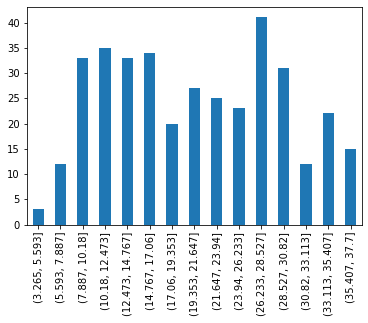

In [3]:
# 分布
mybins = 15
df['temp_max'].value_counts(bins=mybins,sort=False).plot(kind='bar')

In [4]:
# 特定の月の表示
# myyear1/mymonth1 の月の次の月を myyear2/mymonth2 としている
myyear1 = 2020 # 今はこの年しかないのだが
mymonth1 = 12
myyear2,mymonth2 = myyear1+(mymonth1//12), (mymonth1%12)+1
df[(df['date'] >= dt.datetime(myyear1,mymonth1,1)) & (df['date'] < dt.datetime(myyear2,mymonth2,1))]

,date,temp_mean,temp_max,temp_min,rain,daylight
335,2020-12-01,9.4,13.3,6.3,0.0,3.8
336,2020-12-02,8.6,15.6,3.8,0.0,9.2
337,2020-12-03,9.4,13.2,5.7,0.0,4.6
338,2020-12-04,8.8,13.5,5.0,0.0,9.0
339,2020-12-05,8.3,14.3,3.0,0.0,9.1
340,2020-12-06,7.8,15.0,2.9,0.0,9.0
341,2020-12-07,8.6,15.1,2.7,0.0,8.7
342,2020-12-08,8.7,13.0,4.8,0.0,5.0
343,2020-12-09,7.5,12.3,4.1,0.0,4.9
344,2020-12-10,7.7,14.2,2.5,0.0,4.3


In [5]:
# 寒暖差の定義
df['temp_diff'] = df['temp_max'] - df['temp_min']
df.describe()

,temp_mean,temp_max,temp_min,rain,daylight,temp_diff
count,366.000000,366.000000,366.000000,366.000000,366.00000,366.000000
mean,16.000820,20.683607,12.080874,4.494536,5.17459,8.602732
std,8.121072,8.639403,8.316705,11.264563,3.87378,3.243395
min,0.900000,3.300000,-2.300000,0.000000,0.00000,1.400000
25%,8.825000,13.225000,5.025000,0.000000,1.90000,6.125000
50%,14.350000,20.400000,10.600000,0.000000,4.90000,8.400000
75%,23.475000,27.575000,19.800000,1.500000,8.65000,10.700000
max,31.300000,37.700000,27.200000,83.000000,13.80000,18.600000


In [6]:
# 特定の条件を持つデータを表示
df[df['rain']>=50]

,date,temp_mean,temp_max,temp_min,rain,daylight,temp_diff
164,2020-06-13,22.8,25.4,20.9,54.0,0.0,4.5
170,2020-06-19,19.1,21.5,17.2,83.0,0.0,4.3
189,2020-07-08,24.2,28.9,21.4,50.0,2.2,7.5
206,2020-07-25,24.3,26.7,22.9,53.5,0.0,3.8
268,2020-09-25,20.9,22.7,19.7,61.0,0.0,3.0
283,2020-10-10,19.0,21.8,17.4,58.5,0.0,4.4


<AxesSubplot:>

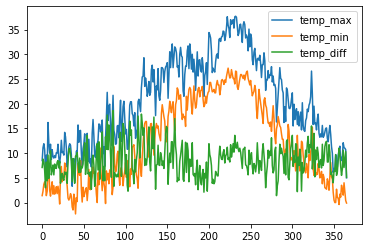

In [7]:
# グラフの表示
df[['temp_max','temp_min','temp_diff']].plot()

In [8]:
# 真夏日などの設定，one-hot vector にする方が良いかもしれない．

summerlist = [ [25,"夏日",1], [30,"真夏日",2], [35,"猛暑日",3] ]

df[['note','notenum']] = ["なし",0]

for summercond in summerlist:
        df.loc[df['temp_max']>=summercond[0],['note','notenum']] = summercond[1:]
# 冬日などはそのまま定義してします
df.loc[df['temp_min']<0,['note','notenum']] = ["冬日",-1]
df.loc[df['temp_max']<0,['note','notenum']] = ["真冬日",-2]
# 相関係数の表示．数値化したものはあまり意味がない様に思える．
df.corr()

,temp_mean,temp_max,temp_min,rain,daylight,temp_diff,notenum
temp_mean,1.000000,0.980246,0.979822,0.117302,0.086424,0.098617,0.854211
temp_max,0.980246,1.000000,0.927521,0.029694,0.235577,0.285345,0.859131
temp_min,0.979822,0.927521,1.000000,0.196841,-0.062658,-0.093568,0.825588
rain,0.117302,0.029694,0.196841,1.000000,-0.451084,-0.425644,-0.059972
daylight,0.086424,0.235577,-0.062658,-0.451084,1.000000,0.788170,0.229991
temp_diff,0.098617,0.285345,-0.093568,-0.425644,0.788170,1.000000,0.171489
notenum,0.854211,0.859131,0.825588,-0.059972,0.229991,0.171489,1.000000


<AxesSubplot:xlabel='daylight', ylabel='temp_diff'>

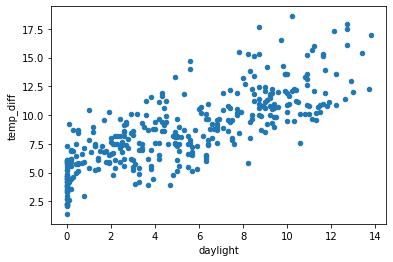

In [9]:
# 日照時間と寒暖差の散布図
df.plot(kind='scatter', x='daylight', y='temp_diff')

In [10]:
# 真夏日などのカウント
df[['note','notenum']].value_counts()

note  notenum
なし     0         223
夏日     1          74
真夏日    2          43
猛暑日    3          19
冬日    -1           7
dtype: int64

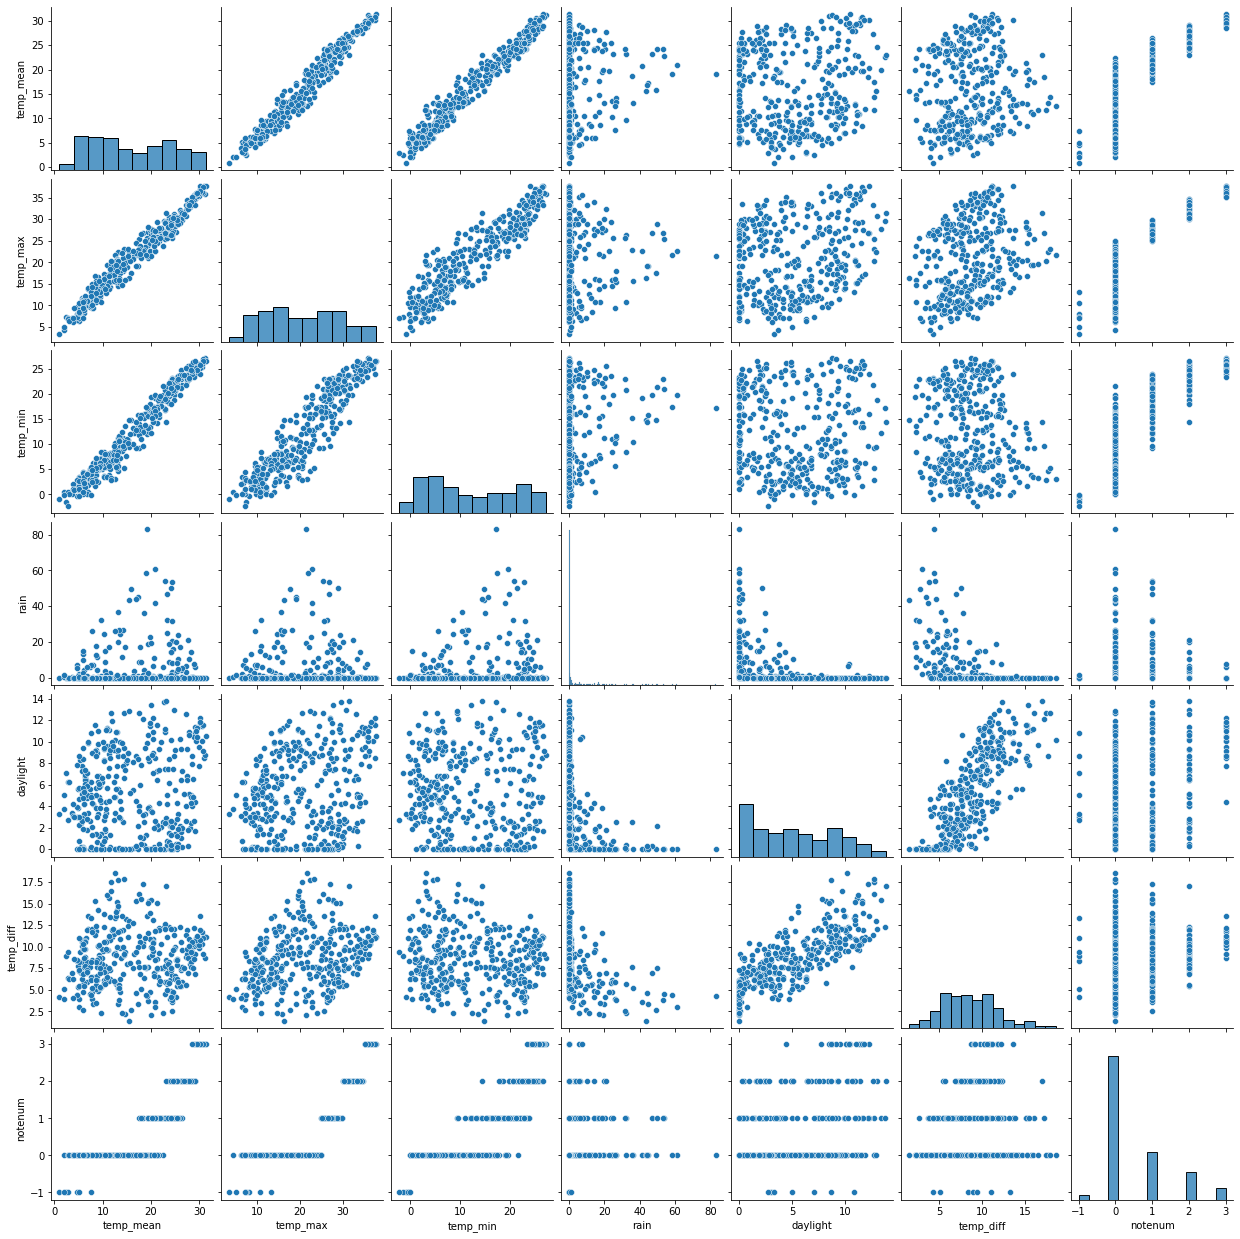

In [11]:
# seaborn による散布行列
import seaborn as sns
sns.pairplot(df)